In [ ]:
!pip install bioframe
!pip install git+https://github.com/manzt/hg.git

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

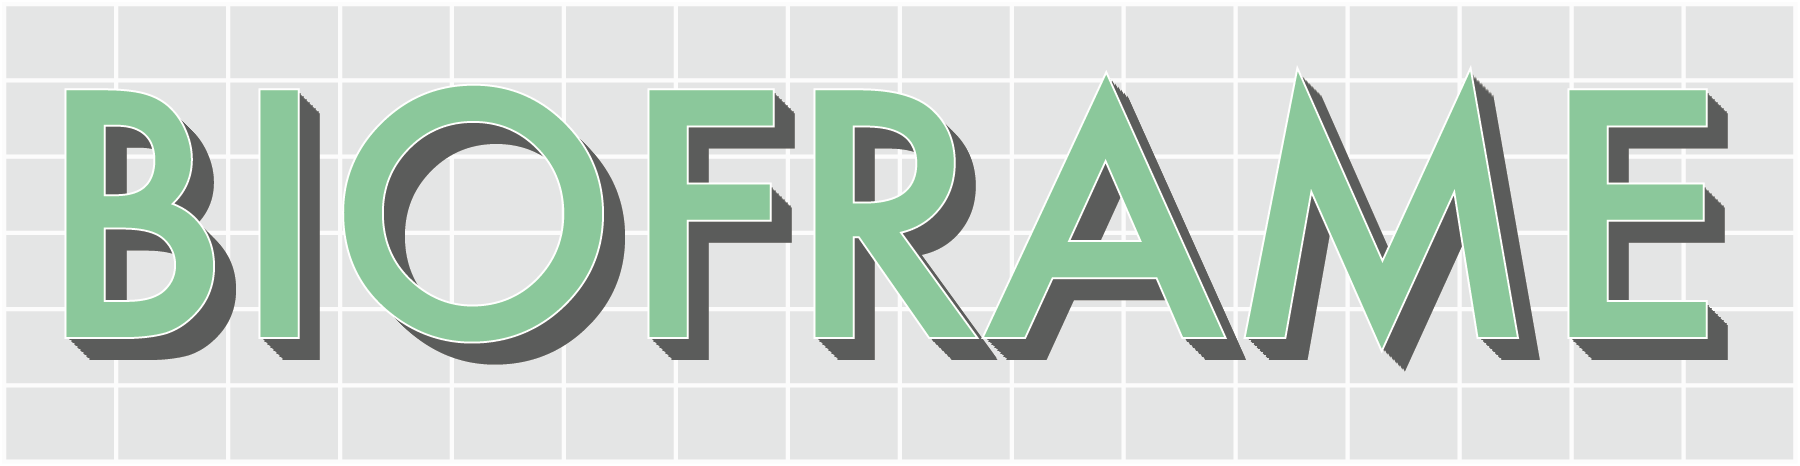

## Bioframe enables flexible and scalable operations on Pandas **dataframes** of **genomic intervals**.

### A sequenced genome provides a common **coordinate system** for locating features of interest.

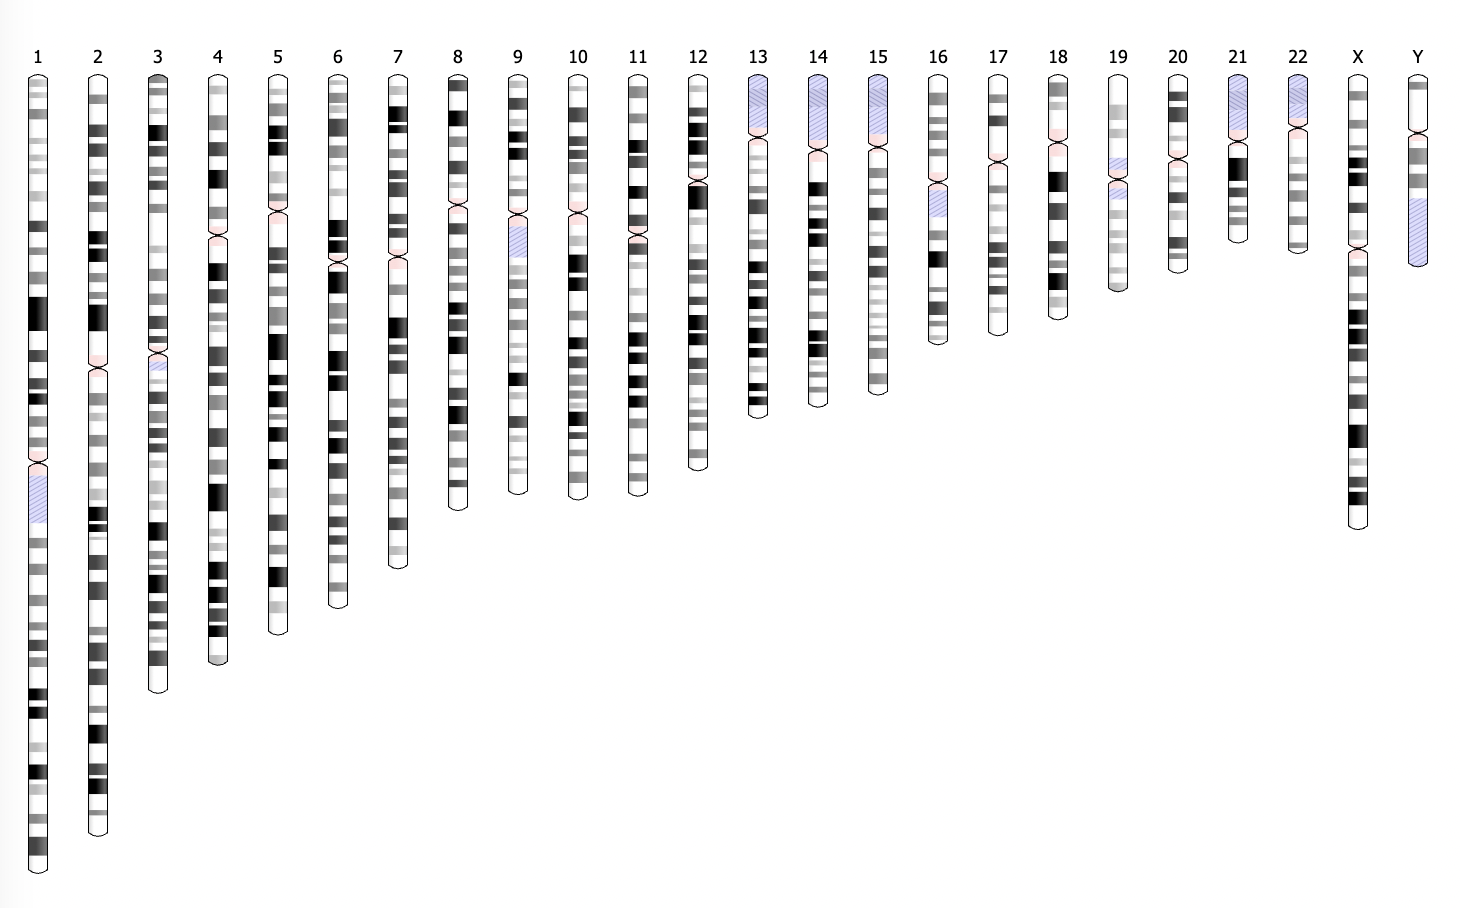

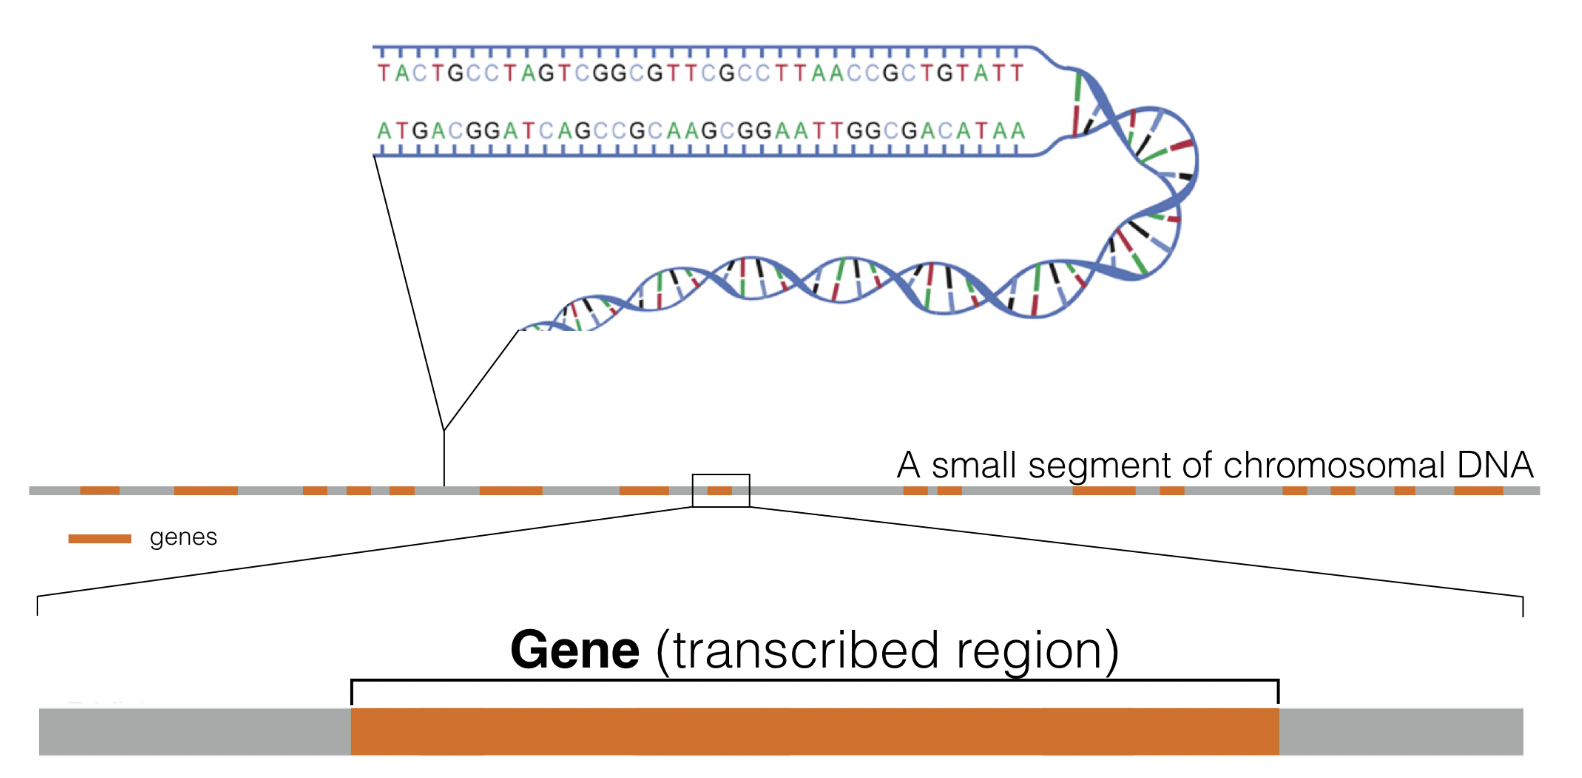

<div style="text-align: center">    
    <sup><sub>Image from <a href="https://bookdown.org/maria_gallegos/where-are-genes/">Fantastic Genes and Where to Find Them</a> by Maria Gallegos
        </sub><sup>
        </div>

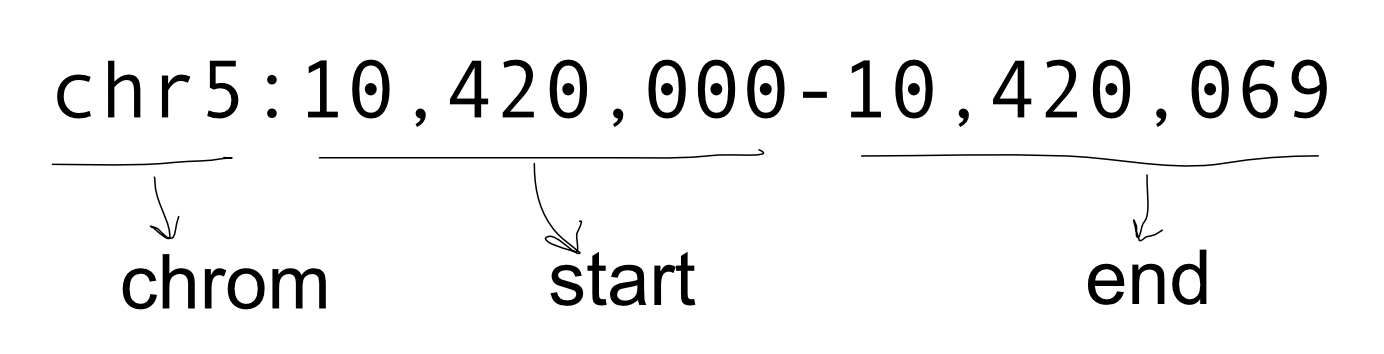

Positions and intervals provide addresses for anything that can be mapped to a [reference genome](https://en.wikipedia.org/wiki/Reference_genome):

* Alignments of short sequencing reads
* Sites of genetic variation
* Individual genes and their substructual components
* Locations occupied by DNA-binding proteins in particular cell types
* And much more!

It is no wonder that positions and intervals are key fields in most genomic data files.

For example, next-generation sequencing (NGS) technologies can map all kinds of functional biomolecular information along this coordinate system.

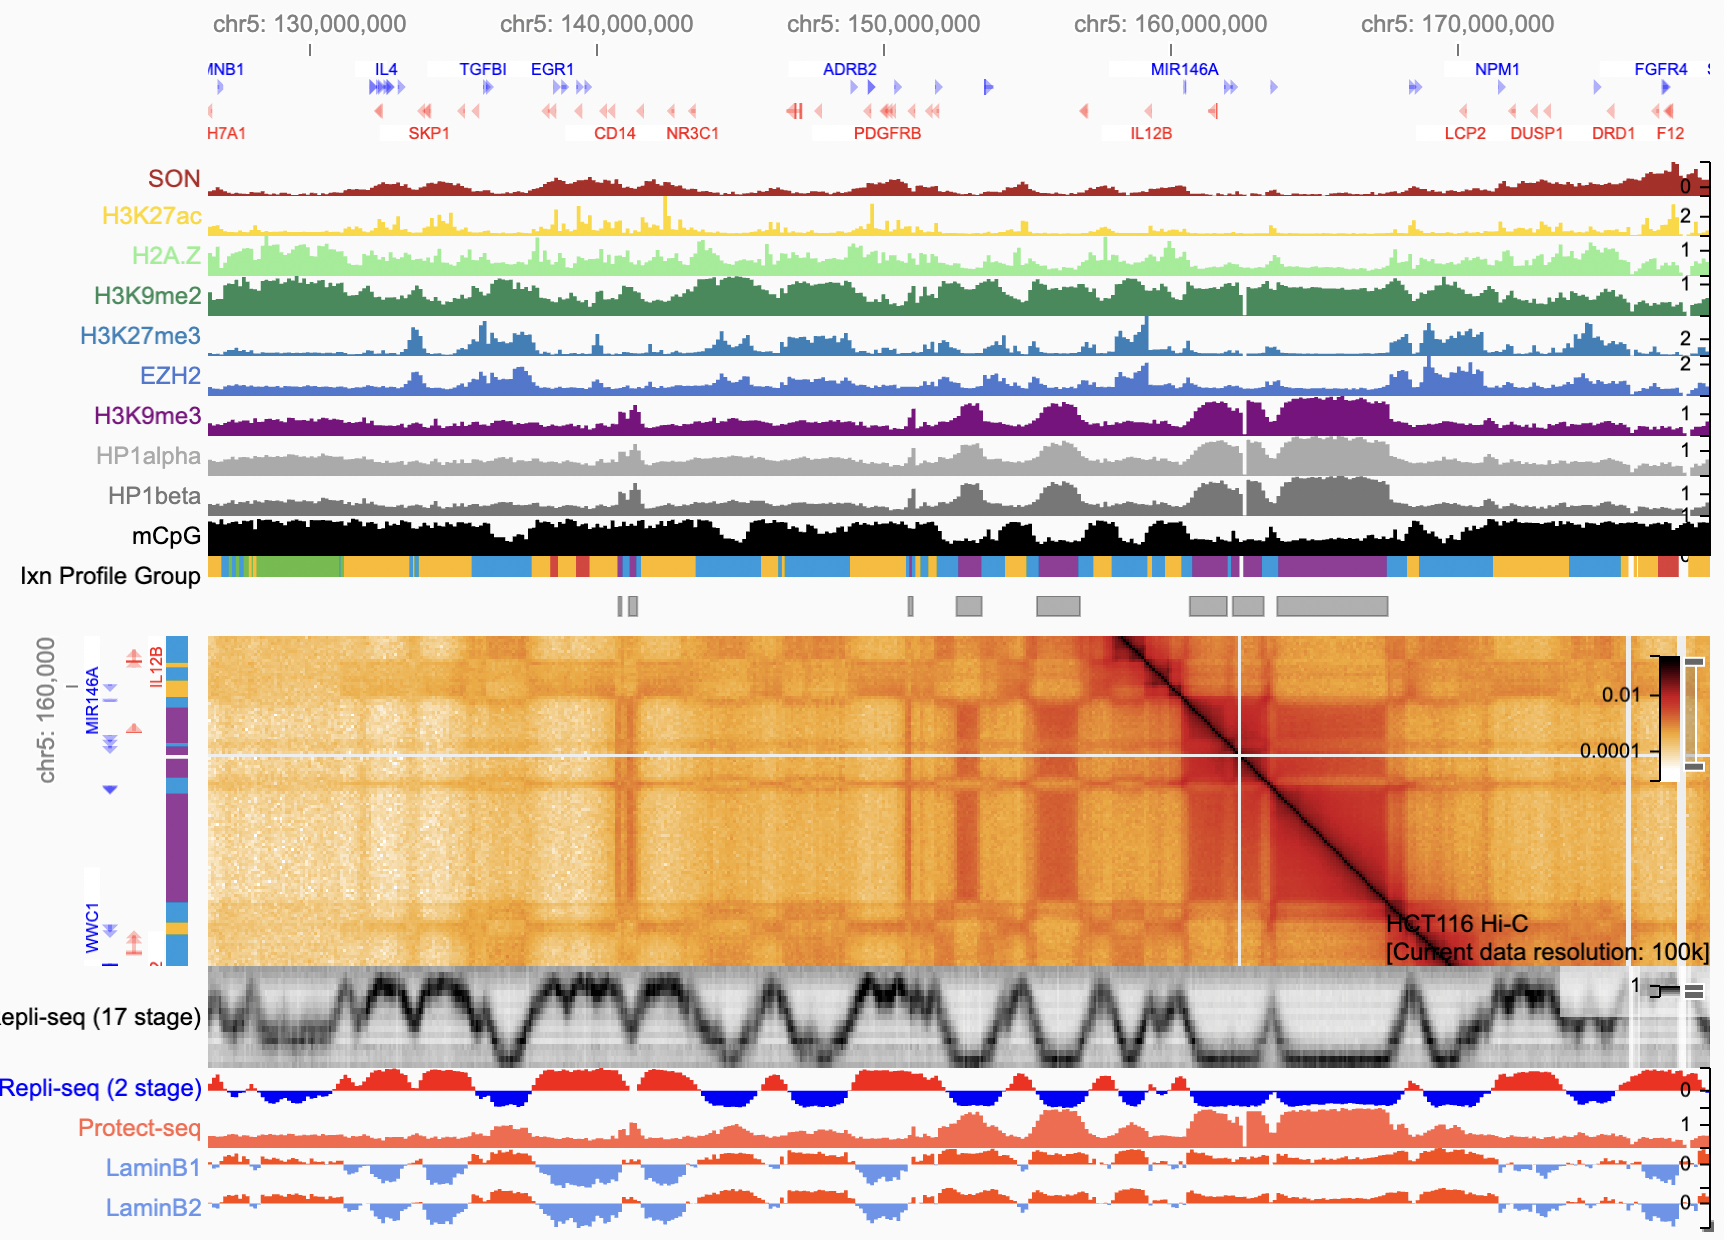

Show a grey line - genome - with some genes, orange intervals  - like on the figure below
Then show another track - let’s say H3K4me3 (just say that that you can do experiment where you can measure gene activity or something like that)
And then pose a question - we would like to find a subset of active genes in this cell line or whatever
Therefore - OVERLAP !
Then you say that this is the most basic/fundamental operation in genomics

# BED frames

The core objects in bioframe are pandas DataFrames of genomic intervals, or BedFrames defined by `chrom`, `start` and `end` columns (the names are configurable). We don't use opaque wrapper objects or DataFrame subclasses.

chrom  start  end
0  chr1      1    5
1  chr1      3    8
2  chr1      8   10
3  chr1     12   14

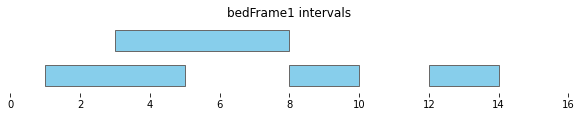

In [34]:
import bioframe as bf

df1 = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8],
    ['chr1', 8, 10],
    ['chr1', 12, 14]],
    columns=['chrom', 'start', 'end']
)

display(df1)

bf.vis.plot_intervals(df1, show_coords=True, xlim=(0,16))
plt.title('bedFrame1 intervals');

chrom  start  end
0  chr1      4    8
1  chr1     10   11

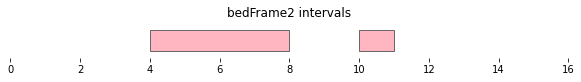

In [35]:
df2 = bf.from_any(
    [['chr1', 4, 8],
     ['chr1', 10, 11]], 
    name_col='chrom'
)

display(df2)

bf.vis.plot_intervals(df2, show_coords=True, xlim=(0,16), colors='lightpink')
plt.title('bedFrame2 intervals');

# Interval operations

## Overlap

The most common operation is to calculate the overlaps between two sets of genomic intervals.

In [30]:
overlaps = bf.overlap(df1, df2, how='inner', suffixes=('_1','_2'))
overlaps

chrom_1  start_1  end_1 chrom_2  start_2  end_2
0    chr1        1      5    chr1        4      8
1    chr1        3      8    chr1        4      8

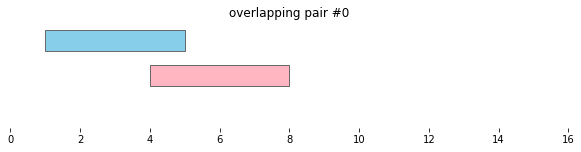

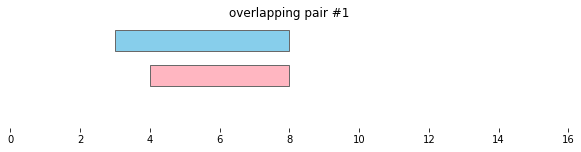

In [31]:
for i, reg_pair in overlaps.iterrows(): 
    bf.vis.plot_intervals_arr(
        starts = [reg_pair.start_1,reg_pair.start_2],
        ends = [reg_pair.end_1,reg_pair.end_2],
        colors = ['skyblue', 'lightpink'],
        levels = [2,1],
        xlim = (0,16),
        show_coords = True)
    plt.title(f'overlapping pair #{i}')

In [14]:
#import hg
#hg.Viewconf.from_url("https://resgen.io/api/v1/viewconfs/Y_omIrpERgG01VsqmtMLVA/?raw=1")

In [ ]:
!pip install bioframe

# Problem

Genomic intervals are one of the most prevalent data structures in computational genome biology, and used to represent features ranging from genes, to DNA binding sites, to disease variants. Operations on genomic intervals provide a language for asking questions about relationships between features. 

While there are excellent interval arithmetic tools for the command line, they are not smoothly integrated into Python, one of the most popular general-purpose computational and visualization environments.


# Enter bioframe

Bioframe is a library to enable flexible and performant operations on genomic interval dataframes in Python. Bioframe extends the Python data science stack to use cases for computational genome biology by building directly on top of two of the most commonly-used Python libraries, numpy and pandas.

The bioframe API enables flexible name and column orders, and decouples operations from data formats to avoid unnecessary conversions, a common scourge for bioinformaticians. Bioframe achieves these goals while maintaining high performance and a rich set of features.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bioframe

## Interval arithmetic

Toy examples with plots

## Performance

Figure from paper

## File I/O

## Other utilities

## Example workflow

In [ ]:
ctcf_peaks = bioframe.read_table(
    "https://www.encodeproject.org/files/ENCFF401MQL/@@download/ENCFF401MQL.bed.gz", 
    schema='narrowPeak'
)

In [ ]:
ctcf_peaks

chrom      start        end name  score strand         fc  -log10p  \
0      chr19   48309541   48309911    .   1000      .    5.04924     -1.0   
1       chr4  130563716  130564086    .    993      .    5.05052     -1.0   
2       chr1  200622507  200622877    .    591      .    5.05489     -1.0   
3       chr5  112848447  112848817    .    869      .    5.05841     -1.0   
4       chr1  145960616  145960986    .    575      .    5.05955     -1.0   
...      ...        ...        ...  ...    ...    ...        ...      ...   
40582   chr8   22574315   22574744    .   1000      .  561.11939     -1.0   
40583  chr15   56246029   56246402    .   1000      .  569.05663     -1.0   
40584   chr1  150979463  150979845    .   1000      .  580.28482     -1.0   
40585  chr16   57649040   57649402    .   1000      .  602.95266     -1.0   
40586  chr12   54379625   54380042    .   1000      .  627.60723     -1.0   

       -log10q  relSummit  
0      0.00438        185  
1      0.00432        185  
2      0.00400        185  
3      0.00441        185  
4      0.00439        185  
...        ...        ...  
40582  4.90268        243  
40583  4.90268        191  
40584  4.90268        194  
40585  4.90268        173  
40586  4.90268        203  

[40587 rows x 10 columns]

In [ ]:
jaspar_url = 'http://expdata.cmmt.ubc.ca/JASPAR/downloads/UCSC_tracks/2022/hg38/'
jaspar_motif_file = 'MA0139.1.tsv.gz'
ctcf_motifs = bioframe.read_table(
    jaspar_url + jaspar_motif_file,
    schema='jaspar',
    skiprows=1
)

In [ ]:
ctcf_motifs

chrom  start    end  name  score  pval strand
0                         chr1  11163  11182  CTCF    811   406      -
1                         chr1  11222  11241  CTCF    959   804      -
2                         chr1  11280  11299  CTCF    939   728      -
3                         chr1  11339  11358  CTCF    837   455      -
4                         chr1  11401  11420  CTCF    829   439      -
...                        ...    ...    ...   ...    ...   ...    ...
770044  chrY_KI270740v1_random   4600   4619  CTCF    815   412      -
770045  chrY_KI270740v1_random   5601   5620  CTCF    815   412      -
770046  chrY_KI270740v1_random   7601   7620  CTCF    815   412      -
770047  chrY_KI270740v1_random   8602   8621  CTCF    815   412      -
770048  chrY_KI270740v1_random  19753  19772  CTCF    806   395      -

[770049 rows x 7 columns]

In [ ]:
df = bioframe.overlap(
    ctcf_peaks, 
    ctcf_motifs, 
    # suffixes=('_1', ''), 
    return_index=True,
    how='left',
)

fraction of peaks without motifs 0.14


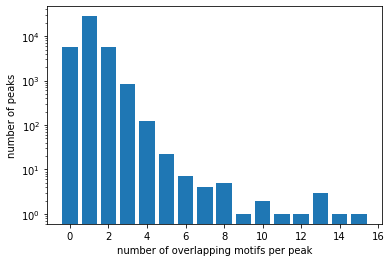

In [ ]:
motifs_per_peak = df.groupby(["index"])["index_"].count().values

bins = np.arange(0, np.max(motifs_per_peak))
counts, _ = np.histogram(motifs_per_peak, bins)
plt.bar(bins[:-1], height=counts, align='center')
plt.xlabel('number of overlapping motifs per peak')
plt.ylabel('number of peaks')
plt.semilogy();

print(f'fraction of peaks without motifs {np.round(np.sum(motifs_per_peak==0)/len(motifs_per_peak),2)}');

In [ ]:
df

index  chrom      start        end name   score strand         fc  \
0          0  chr19   48309541   48309911    .  1000.0      .    5.04924   
1          1   chr4  130563716  130564086    .   993.0      .    5.05052   
2          2   chr1  200622507  200622877    .   591.0      .    5.05489   
3          3   chr5  112848447  112848817    .   869.0      .    5.05841   
4          4   chr1  145960616  145960986    .   575.0      .    5.05955   
...      ...    ...        ...        ...  ...     ...    ...        ...   
48626  40584   chr1  150979463  150979845    .  1000.0      .  580.28482   
48627  40585  chr16   57649040   57649402    .  1000.0      .  602.95266   
48628  40585  chr16   57649040   57649402    .  1000.0      .  602.95266   
48629  40586  chr12   54379625   54380042    .  1000.0      .  627.60723   
48630  40586  chr12   54379625   54380042    .  1000.0      .  627.60723   

       -log10p  -log10q  relSummit  index_ chrom_     start_       end_ name_  \
0         -1.0  0.00438      185.0    <NA>   None       <NA>       <NA>  None   
1         -1.0  0.00432      185.0    <NA>   None       <NA>       <NA>  None   
2         -1.0  0.00400      185.0    <NA>   None       <NA>       <NA>  None   
3         -1.0  0.00441      185.0    <NA>   None       <NA>       <NA>  None   
4         -1.0  0.00439      185.0    <NA>   None       <NA>       <NA>  None   
...        ...      ...        ...     ...    ...        ...        ...   ...   
48626     -1.0  4.90268      194.0   40407   chr1  150979668  150979687  CTCF   
48627     -1.0  4.90268      173.0  261215  chr16   57649185   57649204  CTCF   
48628     -1.0  4.90268      173.0  261216  chr16   57649229   57649248  CTCF   
48629     -1.0  4.90268      203.0  153951  chr12   54379782   54379801  CTCF   
48630     -1.0  4.90268      203.0  153952  chr12   54379835   54379854  CTCF   

       score_  pval_ strand_  
0         NaN    NaN    None  
1         NaN    NaN    None  
2         NaN    NaN    None  
3         NaN    NaN    None  
4         NaN    NaN    None  
...       ...    ...     ...  
48626   925.0  678.0       -  
48627   918.0  656.0       -  
48628   829.0  439.0       +  
48629   863.0  511.0       -  
48630   885.0  564.0       -  

[48631 rows x 19 columns]

In [ ]:
%%bash

echo "Hello World"
which sed

Hello World
/bin/sed


In [1]:
import hg

config = hg.Viewconf.from_url('https://higlass.io/api/v1/viewconf?d=default')

config

Viewconf(editable=True, viewEditable=True, tracksEditable=True, zoomFixed=False, compactLayout=None, exportViewUrl='/api/v1/viewconfs', trackSourceServers=['//higlass.io/api/v1', 'https://resgen.io/api/v1/gt/paper-data'], views=[View(layout=Layout(x=0, y=0, w=12, h=12, moved=False, static=False), tracks=Tracks[TrackT](left=[EnumTrack(tilesetUid='OHJakQICQD6gTD7skx4EWA', server='//higlass.io/api/v1', type='vertical-gene-annotations', uid='dqBTMH78Rn6DeSyDBoAEXw', width=60, height=None, options={'labelPosition': 'bottomRight', 'name': 'Gene Annotations (hg19)'}, data=None, chromInfoPath=None, fromViewUid=None, x=None, y=None), EnumTrack(tilesetUid=None, server=None, type='vertical-chromosome-labels', uid='RHdQK4IRQ7yJeDmKWb7Pcg', width=30, height=None, options={}, data=None, chromInfoPath='//s3.amazonaws.com/pkerp/data/hg19/chromSizes.tsv', fromViewUid=None, x=None, y=None)], right=[], top=[EnumTrack(tilesetUid='OHJakQICQD6gTD7skx4EWA', server='//higlass.io/api/v1', type='horizontal-gene-annotations', uid='OHJakQICQD6gTD7skx4EWA', width=None, height=60, options={'name': 'Gene Annotations (hg19)'}, data=None, chromInfoPath=None, fromViewUid=None, x=None, y=None), EnumTrack(tilesetUid=None, server=None, type='horizontal-chromosome-labels', uid='X4e_1DKiQHmyghDa6lLMVA', width=None, height=30, options={}, data=None, chromInfoPath='//s3.amazonaws.com/pkerp/data/hg19/chromSizes.tsv', fromViewUid=None, x=None, y=None)], bottom=[], center=[CombinedTrack(type='combined', uid='c1', width=None, height=200, options={}, contents=[HeatmapTrack(tilesetUid='CQMd6V_cRw6iCI_-Unl3PQ', server='//higlass.io/api/v1', type='heatmap', uid='GjuZed1ySGW1IzZZqFB9BA', width=None, height=None, options={'maxZoom': None, 'labelPosition': 'bottomRight', 'name': 'Rao et al. (2014) GM12878 MboI (allreps) 1kb'}, data=None, position='center', transforms=None)], position='center')], whole=None, gallery=None), uid='aa', autocompleteSource='/api/v1/suggest/?d=OHJakQICQD6gTD7skx4EWA&', chromInfoPath='//s3.amazonaws.com/pkerp/data/hg19/chromSizes.tsv', genomePositionSearchBox=GenomePositionSearchBox(autocompleteServer='//higlass.io/api/v1', autocompleteId='OHJakQICQD6gTD7skx4EWA', chromInfoServer='//higlass.io/api/v1', chromInfoId='hg19', visible=True), genomePositionSearchBoxVisible=None, initialXDomain=(0.0, 3100000000.0), initialYDomain=None, overlays=None, selectionView=None, zoomFixed=None, zoomLimits=(1, None))], zoomLocks=ZoomLocks(locksByViewUid={}, locksDict={}), locationLocks=LocationLocks(locksByViewUid={}, locksDict={}), valueScaleLocks=None, chromInfoPath=None)